# PIA.

Simulación.

**Grupo:** 001.

**Prof.** Lic. Blanca Elida Serna Rodríguez.

**Equipo dinamita.**

*Integrantes:*

* Angel Emmanuel Hernández Galván.
* Alma Cecilia Villarreal Duarte.

# Problema: Cola con 2 servidores en Serie

Simular los tiempos de llegadas y de servicio de los clientes a un sistema donde pasan por dos servidores en serie para luego salir del sistema. 

Si el servidor está ocupado por algún cliente, éste debe esperar en la cola correspondiente del servidor.

Una vez simulados los tiempos, se busca obtener el tiempo medio del cliente en el sistema y el tiempo medio del cliente en cada cola.

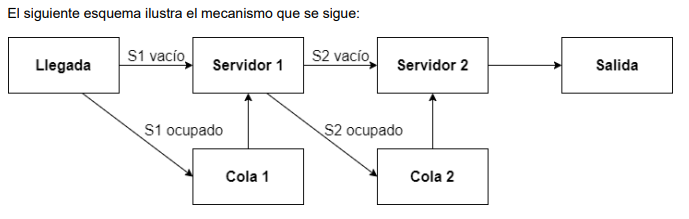

## Funciones.

Semilla

In [1]:
set.seed = 123

### Función de generación de llegadas. Poisson No Homogéneo Mejorado.

Regresa la simulación de tiempos de llegada en un vector.

In [2]:
lambda <- function(x)(5+5*x)*I(x>=0&x<=3)+20*I(x>3&x<=5)+(20-2*(x-5))*I(x>5&x<=9)
#curve(lambda(x),xlim=c(0,9),col="red",lwd=2)
# partición
# usar S2, u3 y u4, para hacer comparación entre los códigos NHPP
S2 <- vector()
ti <- c(1,2,6,7,8,9)
lj <- c(10,15,20,18,16,14)
T1 <- 9
k <- length(ti)
# función para generar instantes del NHPP
Gen_Llegadas <- function()
{
  t <- 0; I <- 0; J <- 1; K=0
  repeat
  {
    u3 <- runif(1)
    X <- -(log(u3)/lj[J])
    
    # Paso 1, al revés: si t+X<=tJ, ...
    if(t+X<=ti[J]&J<=k)
    {
      t <- t+X
      u4 <- runif(1)
    }
    if(u4<=lambda(t)/lj[J])
    {
      I <- I+1
      S2[I] <- t
    } else {K=K+1}
    if(X+t>ti[J]&J<k)
    {
      # Paso 2, primero lo de abajo del algoritmo 
      X <- (lj[J]*(X-(ti[J]-t)))/lj[J+1]
      t <- ti[J]
      J <- J+1
    }
    # Regresa paso 1
    if(t+X>ti[J]&J==k)
      break
  }
  #print("S")
  return(S2)
  #return((I+K)/I)
}

### Función de generación de tiempo de servicio. Exponencial con parámetro $\theta$

Regresa un tiempo de atención para un servidor dado el parametro $\theta$

In [3]:
# Generación de tiempo de servicio
tserv<-function(Teta){
  t<-(-1/Teta)*log(runif(1))
  return(t)
}

### Función de simulación del sistema para un servidor

Dado un vector de tiempos de llegada, tiempo de cierre y el parametro $\theta$ para la generación de tiempos de atención, regresa los tiempos de duración de los clientes en el sistema, los tiempos de atención de cada cliente y los tiempos de salida de cada cliente.

In [4]:
Sistema <- function(Vec_tiempos_llegada, Tiempo_cierre, Teta){
  
  # Inicializacion
  Tiempo <- 0
  Contador_llegadas <- 0
  Contador_salidas <- 0
  Num_clientes_servidor1 <- 0
  Vec_tiempos_atencion <- vector()
  Vec_tiempos_salida <- vector()
  Vec_clientes_en_sistema <- vector()
  Tiempo_despues_de_cierre <- 0
  
  Tiempo_llegada <- Vec_tiempos_llegada[1]
  Tiempo_salida <- Inf
  Vec_Tiempo_cliente_en_sistema <- vector()
  
  i <- 1
  j <- 1
  
  repeat{
    
    # PARTE 1
    if ((Tiempo_llegada <= Tiempo_salida) & (Tiempo_llegada <= Tiempo_cierre)){
      Tiempo <- Tiempo_llegada
      Contador_llegadas <- Contador_llegadas + 1
      i <- i + 1
      Tiempo_llegada <- Vec_tiempos_llegada[i]
      Num_clientes_servidor1 <- Num_clientes_servidor1 + 1
      Vec_clientes_en_sistema[length(Vec_clientes_en_sistema) + 1] <- Num_clientes_servidor1
      if (Num_clientes_servidor1 == 1){
        Vec_tiempos_atencion[j] <- tserv(Teta)
        Tiempo_salida <- Tiempo + Vec_tiempos_atencion[j]
        j <- j+1
      }
    }
    
    # PARTE 2
    if ((Tiempo_salida <= Tiempo_llegada) & (Tiempo_salida <= Tiempo_cierre)){
      Tiempo <- Tiempo_salida
      Contador_salidas <- Contador_salidas + 1
      Num_clientes_servidor1 <- Num_clientes_servidor1 - 1
      Vec_clientes_en_sistema[length(Vec_clientes_en_sistema) + 1] <- Num_clientes_servidor1
      Vec_tiempos_salida[Contador_salidas] <- Tiempo
      Vec_Tiempo_cliente_en_sistema[Contador_salidas] <- Vec_tiempos_salida[Contador_salidas] - Vec_tiempos_llegada[Contador_salidas]
      if (Num_clientes_servidor1 == 0){
        Tiempo_salida <- Inf
      }
      if (Num_clientes_servidor1 > 0){
        Vec_tiempos_atencion[j] <- tserv(Teta)
        Tiempo_salida <- Tiempo + Vec_tiempos_atencion[j]
        j <- j+1
      }
    }
    
    # PARTE 3
    if (min(Tiempo_llegada,Tiempo_salida) > Tiempo_cierre){
      if (Num_clientes_servidor1 > 0){
        Tiempo <- Tiempo_salida
        Contador_salidas <- Contador_salidas + 1
        Num_clientes_servidor1 <- Num_clientes_servidor1 - 1
        Vec_clientes_en_sistema[length(Vec_clientes_en_sistema) + 1] <- Num_clientes_servidor1
        Vec_tiempos_salida[Contador_salidas] <- Tiempo
        Vec_Tiempo_cliente_en_sistema[Contador_salidas] <- Vec_tiempos_salida[Contador_salidas] - Vec_tiempos_llegada[Contador_salidas]
        if (Num_clientes_servidor1 > 0){
          Vec_tiempos_atencion[j] <- tserv(Teta)
          Tiempo_salida <- Tiempo + Vec_tiempos_atencion[j]
          j <- j+1
        }
      }
      
      # PARTE 4
      if (Num_clientes_servidor1 == 0){
        Tiempo_despues_de_cierre <- max(Tiempo - Tiempo_cierre, 0)
        break
      }
    }
  }
  
  if (Tiempo_salida == Inf){
    Tiempo_salida <- Tiempo
  }
  resultados<-list("tiempos en el sistema",Vec_Tiempo_cliente_en_sistema,"clientes en el sistema",Vec_clientes_en_sistema,
                   "tiempo medio cliente en el sistema",mean(Vec_Tiempo_cliente_en_sistema,na.rm=TRUE),
                   "número medio clientes en el sistema",mean(Vec_clientes_en_sistema),
                   "tiempo después cierre",Tiempo_despues_de_cierre ,"tiempos atención",Vec_tiempos_atencion,
                   "última salida",Tiempo_salida,"tiempos de salida", Vec_tiempos_salida)
  return(resultados)
  
}   

## Proceso de simulación de sistema de colas de 2 servidores en serie

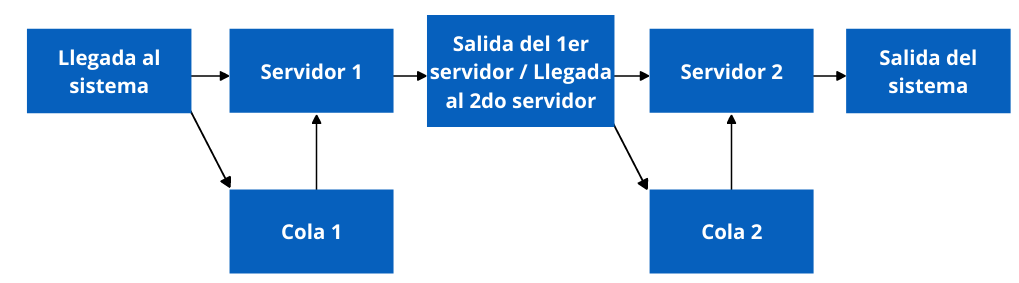

Para simular el proceso se modela el problema como un sistema de 2 servidores individuales donde el tiempo de salida del primer servidor será exactamente el tiempo de llegada al segundo.

#### Paso 1:

Se genera un vector con los tiempos de llegada de los clientes a través de la función generadora Poisson.

In [5]:
# GENERADOR DE LLEGADAS AL SISTEMA
Llegadas_S1 <- Gen_Llegadas()
Llegadas_S1[length(Llegadas_S1)+1] <- Inf

#### Paso 2:

Se manda a llamar la función que simula el sistema de un servidor introduciendo los atributos:

* Vector con la lista de llegadas
* Tiempo de cierre del sistema
* Valor de $\theta$ para la generación de tiempos de servicio del primer servidor

Esto representa la simulación de los clientes en el primer servidor del diagrama.

In [6]:
# SISTEMA DEL SERVIDOR 1
Servidor1 <- Sistema(Llegadas_S1,9,15)

#### Paso 3:

Con la información que nos devuelve la ejecución del primer servidor se obtiene un vector con los tiempos de salida del primer servidor de cada uno de los clientes. Estos tiempos serán interpretados como los tiempos de llegada del segundo servidor.

In [7]:
# GENERADOR DE LLEGADAS AL SERVIDOR 2 (LLEGADAS AL SISTEMA + TIEMPO EN EL SERVIDOR 1)
Llegadas_S2 <- vector()
Llegadas_S2 <- as.numeric(unlist(Servidor1[16]))
Llegadas_S2[length(Llegadas_S2)+1] <- Inf

#### Paso 4:

Se manda a llamar nuevamente la función que simula el sistema de un servidor introducciendo los siguientes atributos:

* Vector con la lista de salidas del primer servidor, las cuales se toman como una lista de llegadas al segundo servidor.
* Tiempo de la última salida del primer servidor, esto para tener en cuenta la ultima entrada del ultimo cliente y no dejarlos fuera cuando se recorra de nuevo la función. Además se corregirá con +0.01 para no afectar el flujo del programa con los condicionales.
* Valor de $ \theta$ para la generación de tiempos del servicio del segundo servidor

In [8]:
# SISTEMA DEL SERVIDOR 2
Servidor2 <- Sistema(Llegadas_S2,Llegadas_S2[length(Llegadas_S2)-1]+0.01, 15)

#### Paso 5:

* Se suma el total de tiempo que paso cada cliente en ambos servidores para obtener el tiempo total que pasaron dentro del sistema.
* Se obtiene el tiempo total en cada cola al hacer una diferencia entre el tiempo en servidor y el tiempo de servicio de cada cliente.

In [9]:
# TIEMPOS DEL CLIENTE EN EL SISTEMA
Vec_Tiempos_Total_Sistema <-  as.numeric(unlist(Servidor1[2])) + as.numeric(unlist(Servidor2[2]))

In [10]:
# TIEMPOS DEL CLIENTE EN CADA COLA
Vec_tiempo_en_cola_S1 <- as.numeric(unlist(Servidor1[2])) - as.numeric(unlist(Servidor1[12]))

Vec_tiempo_en_cola_S2 <- as.numeric(unlist(Servidor2[2])) - as.numeric(unlist(Servidor2[12]))

#### Paso 6:

Se ordenan los resultados en un solo Data Frame

In [11]:
df_Resultados <- data.frame(Llegada_al_sistema = Llegadas_S1[1:(length(Llegadas_S1)-1)],
                        Tiempo_atencion_Servidor1 = as.numeric(unlist(Servidor1[12])),
                        Cola_Servidor1 = Vec_tiempo_en_cola_S1,
                        Tiempo_atencion_Servidor2 = as.numeric(unlist(Servidor1[12])),
                        Cola_Servidor2 = Vec_tiempo_en_cola_S2,
                        Tiempo_total_en_sistema = Vec_Tiempos_Total_Sistema,
                        Salida_del_sistema = as.numeric(unlist(Servidor2[16])))
head(df_Resultados)

,Llegada_al_sistema,Tiempo_atencion_Servidor1,Cola_Servidor1,Tiempo_atencion_Servidor2,Cola_Servidor2,Tiempo_total_en_sistema,Salida_del_sistema
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06105221,0.02223534,3.469447e-18,0.02223534,-3.469447e-18,0.04908805,0.1101403
2,0.23134804,0.05110902,6.938894e-18,0.05110902,-2.428613e-17,0.06189019,0.2932382
3,0.26858663,0.02242332,1.387043e-02,0.02242332,-2.255141e-17,0.04025748,0.3088441
4,0.44673351,0.03583632,-6.938894e-18,0.03583632,-1.387779e-17,0.11717818,0.5639117
5,0.61708582,0.02828758,0.000000e+00,0.02828758,1.040834e-17,0.04493696,0.6620228
6,0.89084896,0.12883184,8.326673e-17,0.12883184,2.428613e-17,0.15708415,1.0479331


## Resultados

In [12]:
summary(df_Resultados)

 Llegada_al_sistema Tiempo_atencion_Servidor1 Cola_Servidor1  
 Min.   :0.06105    Min.   :0.0000725         Min.   :0.0000  
 1st Qu.:2.98964    1st Qu.:0.0167173         1st Qu.:0.2742  
 Median :4.56066    Median :0.0426981         Median :0.5289  
 Mean   :4.69733    Mean   :0.0640553         Mean   :0.6293  
 3rd Qu.:6.54120    3rd Qu.:0.0853973         3rd Qu.:0.9680  
 Max.   :8.87844    Max.   :0.2788815         Max.   :1.7853  
 Tiempo_atencion_Servidor2 Cola_Servidor2   Tiempo_total_en_sistema
 Min.   :0.0000725         Min.   :0.0000   Min.   :0.04026        
 1st Qu.:0.0167173         1st Qu.:0.2084   1st Qu.:0.56900        
 Median :0.0426981         Median :0.4255   Median :1.46151        
 Mean   :0.0640553         Mean   :0.6237   Mean   :1.38825        
 3rd Qu.:0.0853973         3rd Qu.:1.0199   3rd Qu.:2.14246        
 Max.   :0.2788815         Max.   :1.7726   Max.   :2.50816        
 Salida_del_sistema
 Min.   : 0.1101   
 1st Qu.: 3.4598   
 Median : 6.0337   
 Me

**Tiempos de llegada**
* Llegada del primer cliente al sistema: 0 horas y 3.66 min
* Llegada del último cliente al sistema: 11 horas y 1 min

**Tiempos de atención**
* Tiempo medio de atención en Servidor 1: 3.8 min
* Tiempo medio de atención en Servidor 2: 3.8 min

**Tiempos de espera**
* Tiempo medio de espera en Servidor 1: 0 horas y 37.7 min
* Tiempo medio de espera en Servidor 2: 0 horas y 37.42 min

**Tiempo total en el sistema**
* Tiempo medio de los clientes en el sistema: 1 hora y 23.2 min

**Tiempos de salidas**
* Salida del primer cliente: 0 horas y 6.6 min
* Salida del último cliente: 11 horas y 1 min

## Gráficos.

**Tiempos en colas del servidor 1 y 2.**

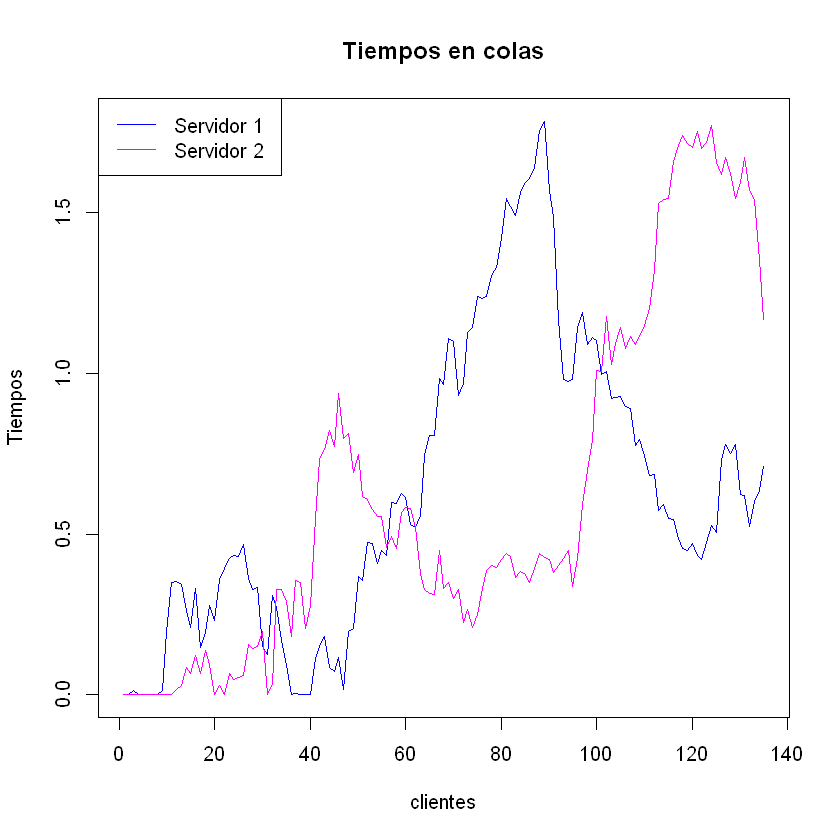

In [13]:
plot(Vec_tiempo_en_cola_S1, 
     type="l", 
     col="blue",
     xlab="clientes", 
     ylab="Tiempos", 
     main="Tiempos en colas",
    ylim = c(0, max(max(Vec_tiempo_en_cola_S1), max(Vec_tiempo_en_cola_S2))))
lines(Vec_tiempo_en_cola_S2, type="l", col="magenta")
legend("topleft", legend = c("Servidor 1", "Servidor 2"), lty = 1, col = c("blue", "magenta"))

**Intervalos de tiempo de llegada y de salida del sistema de cada cliente atendido**

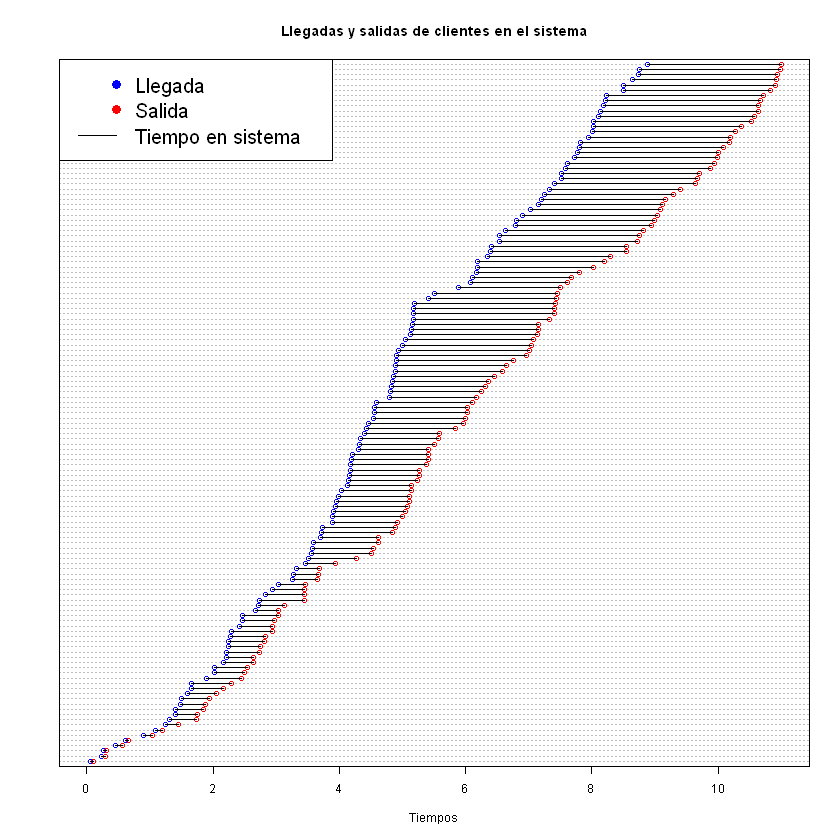

In [14]:
dotchart(Llegadas_S1[1:(length(Llegadas_S1)-1)],
         xlab="Tiempos",
         ylab="Número de cliente",
         main="Llegadas y salidas de clientes en el sistema",
        xlim = c(0,as.numeric(unlist(Servidor2[14]))),
        cex = 0.6,
        col = 'blue')
Salidas <- Llegadas_S1[1:(length(Llegadas_S1)-1)] + Vec_Tiempos_Total_Sistema
points(Salidas,1:(length(Llegadas_S1)-1), cex = 0.5, pch=21,col = "red")
invisible(sapply(1:(length(Llegadas_S1)-1), function(i) {
    segments(Llegadas_S1[i], i, Salidas[i], i)
}))

legend( x="topleft", 
        legend=c("Llegada","Salida","Tiempo en sistema"), 
        col=c("blue","red","black"), lwd=1, lty=c(NA,NA,1), 
        pch=c(19,19,NA), merge=FALSE )


**Tiempos totales en sistema y media.**

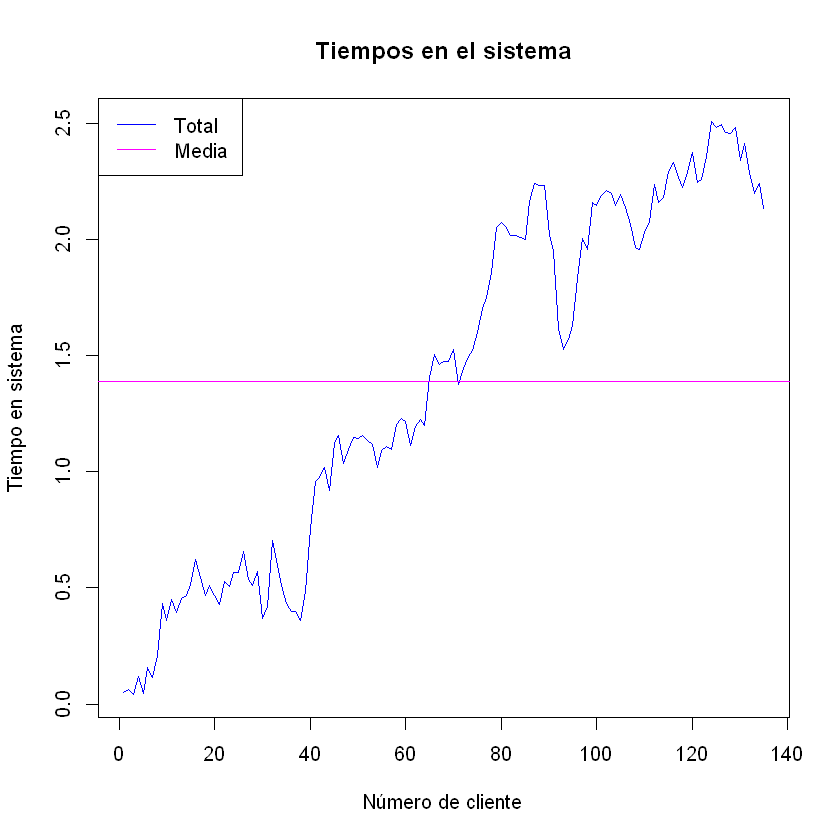

In [15]:
plot(Vec_Tiempos_Total_Sistema, type="l", col="blue",  xlab="Número de cliente", ylab="Tiempo en sistema", main="Tiempos en el sistema")
abline(h=mean(Vec_Tiempos_Total_Sistema), col="magenta")
legend("topleft", legend = c("Total", "Media"), lty = 1, col = c("blue", "magenta"))

Nota: Se uso una semilla para realizar un ejemplo con conclusiones y que estas no tuviesen que ser cambiadas en cada ejecución. Por esto, los tiempos de atención son iguales para ambos servidores.